## Photometric Frequency Analysis

In [2]:
import numpy as np
from sklearn import *
import pandas as pd
import matplotlib.pyplot as plt

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be remo

In [3]:
# Installing pydotplus
!pip install pydotplus
!pip install sphinx sphinx_rtd_theme tox

    100% |████████████████████████████████| 286kB 3.5MB/s ta 0:00:01
  Stored in directory: /home/nbuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
    100% |████████████████████████████████| 6.4MB 374kB/s ta 0:00:011    66% |█████████████████████▏          | 4.2MB 11.0MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 3.2MB/s ta 0:00:011
    100% |████████████████████████████████| 2.0MB 1.3MB/s ta 0:00:011
  Found existing installation: filelock 2.0.6
Cannot uninstall 'filelock'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [4]:
data = np.load('sdss_galaxy_colors (1).npy')

In [5]:
df = pd.DataFrame(data)

In [6]:
df.head(10)

,u,g,r,i,z,spec_class,redshift,redshift_err
0,19.84132,19.52656,19.46946,19.17955,19.10763,b'QSO',0.539301,0.000065
1,19.86318,18.66298,17.84272,17.38978,17.14313,b'GALAXY',0.164570,0.000012
2,19.97362,18.31421,17.47922,17.07440,16.76174,b'GALAXY',0.041900,0.000022
3,19.05989,17.49459,16.59285,16.09412,15.70741,b'GALAXY',0.044277,0.000011
4,19.45567,18.33084,17.67185,17.30189,17.13650,b'GALAXY',0.041644,0.000018
5,18.27065,18.08745,18.08966,18.22180,18.37045,b'QSO',0.396530,0.056599
6,18.94490,17.45382,16.71061,16.26543,15.94860,b'GALAXY',0.073319,0.000010
7,19.71360,18.72367,18.05320,17.62663,17.39702,b'GALAXY',0.116479,0.000008
8,18.84868,16.86433,15.90334,15.42890,15.08823,b'GALAXY',0.057814,0.000016
9,19.76609,18.53251,17.90900,17.48039,17.26884,b'GALAXY',0.081053,0.000007


In [7]:
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
df.columns

Index(['u', 'g', 'r', 'i', 'z', 'spec_class', 'redshift', 'redshift_err'], dtype='object')

In [9]:
df['u'].describe()

count    50000.000000
mean        19.071964
std          0.746759
min         13.422110
25%         18.727580
50%         19.241820
75%         19.617910
max         19.999940
Name: u, dtype: float64

In [28]:
u_g = df['u'] - df['g']
g_r = df['g'] - df['r']
r_i = df['r'] - df['i']
i_z = df['i'] - df['z']


In [10]:
df.describe()

,u,g,r,i,z,redshift,redshift_err
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,19.071964,17.773855,17.122234,16.775569,16.538774,0.290326,0.000120
std,0.746759,0.918719,1.080265,1.161571,1.242212,0.539877,0.004079
min,13.422110,12.357220,11.629170,11.051390,10.616260,-0.000513,0.000000
25%,18.727580,17.309120,16.512945,16.098915,15.785885,0.064022,0.000010
50%,19.241820,17.850830,17.100425,16.708060,16.438700,0.093929,0.000016
75%,19.617910,18.270533,17.641098,17.292275,17.098535,0.142451,0.000025
max,19.999940,19.991610,19.999860,19.996950,19.984700,6.701415,0.449662


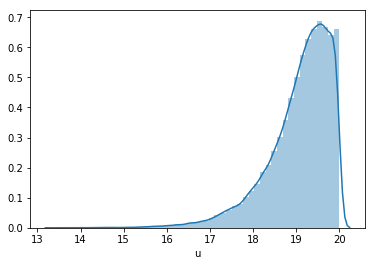

In [11]:
sns.distplot(df['u']);

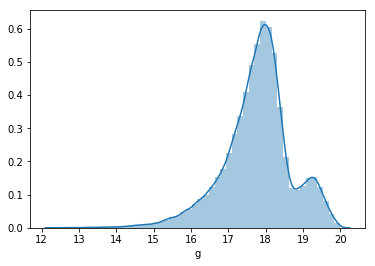

In [12]:
sns.distplot(df['g']);

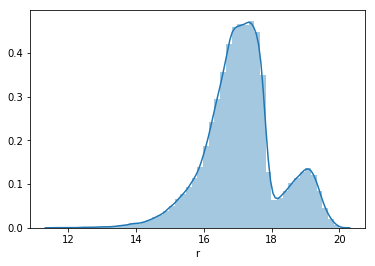

In [13]:
sns.distplot(df['r']);

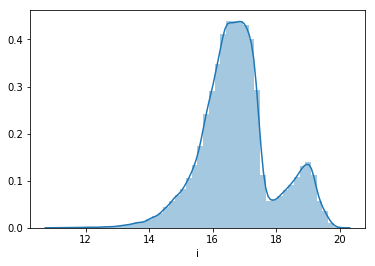

In [14]:
sns.distplot(df['i']);

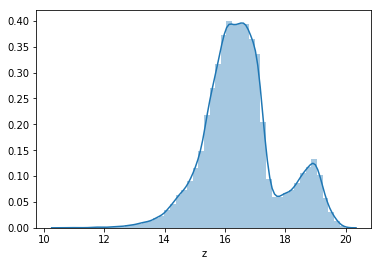

In [15]:
sns.distplot(df['z']);

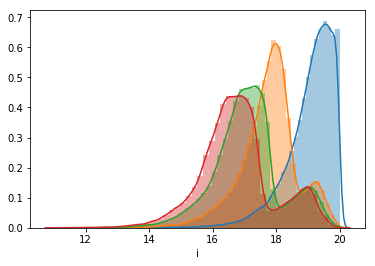

In [16]:
sns.distplot(df['u']); sns.distplot(df['g']); sns.distplot(df['r']); sns.distplot(df['i']);

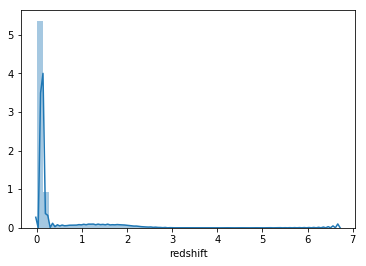

In [17]:
sns.distplot(df['redshift']);

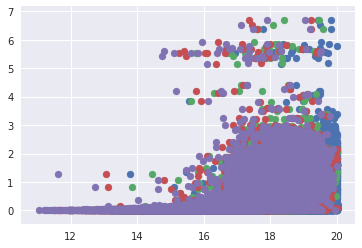

In [27]:
plt.scatter(df['u'], df['redshift'], alpha=1);
plt.scatter(df['g'], df['redshift'], alpha=1);
plt.scatter(df['r'], df['redshift'], alpha=1);
plt.scatter(df['i'], df['redshift'], alpha=1);

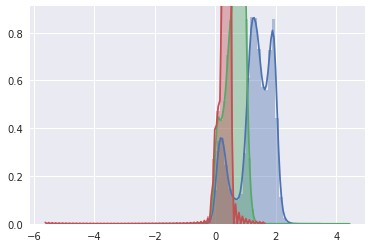

In [29]:
sns.distplot(u_g); sns.distplot(g_r); sns.distplot(r_i); 

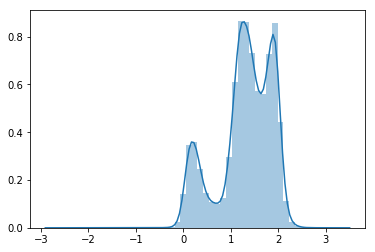

In [42]:
sns.distplot(u_g);

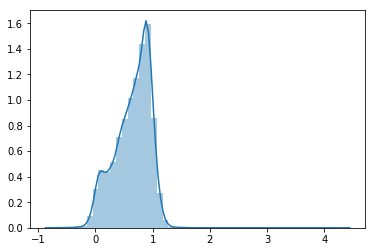

In [39]:
sns.distplot(g_r);

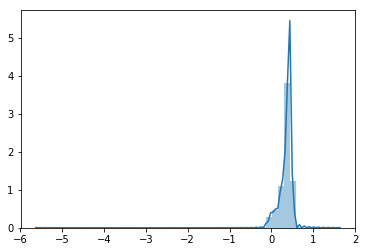

In [40]:
 sns.distplot(r_i); 

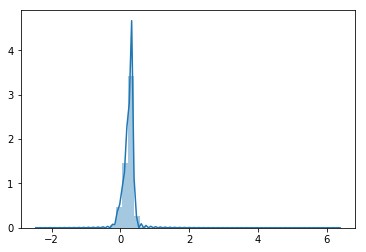

In [41]:
sns.distplot(i_z); 

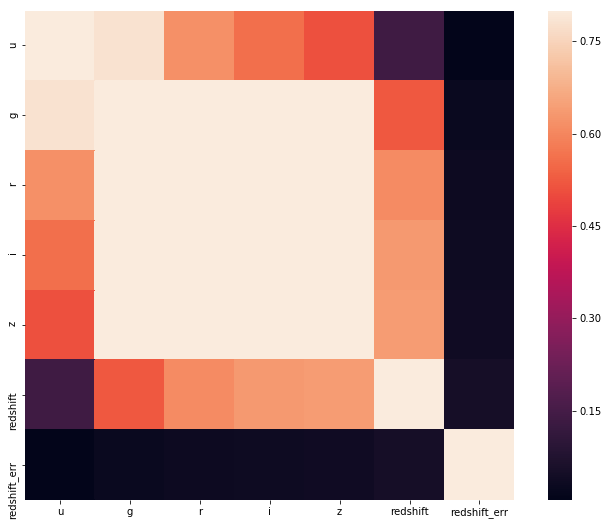

In [44]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

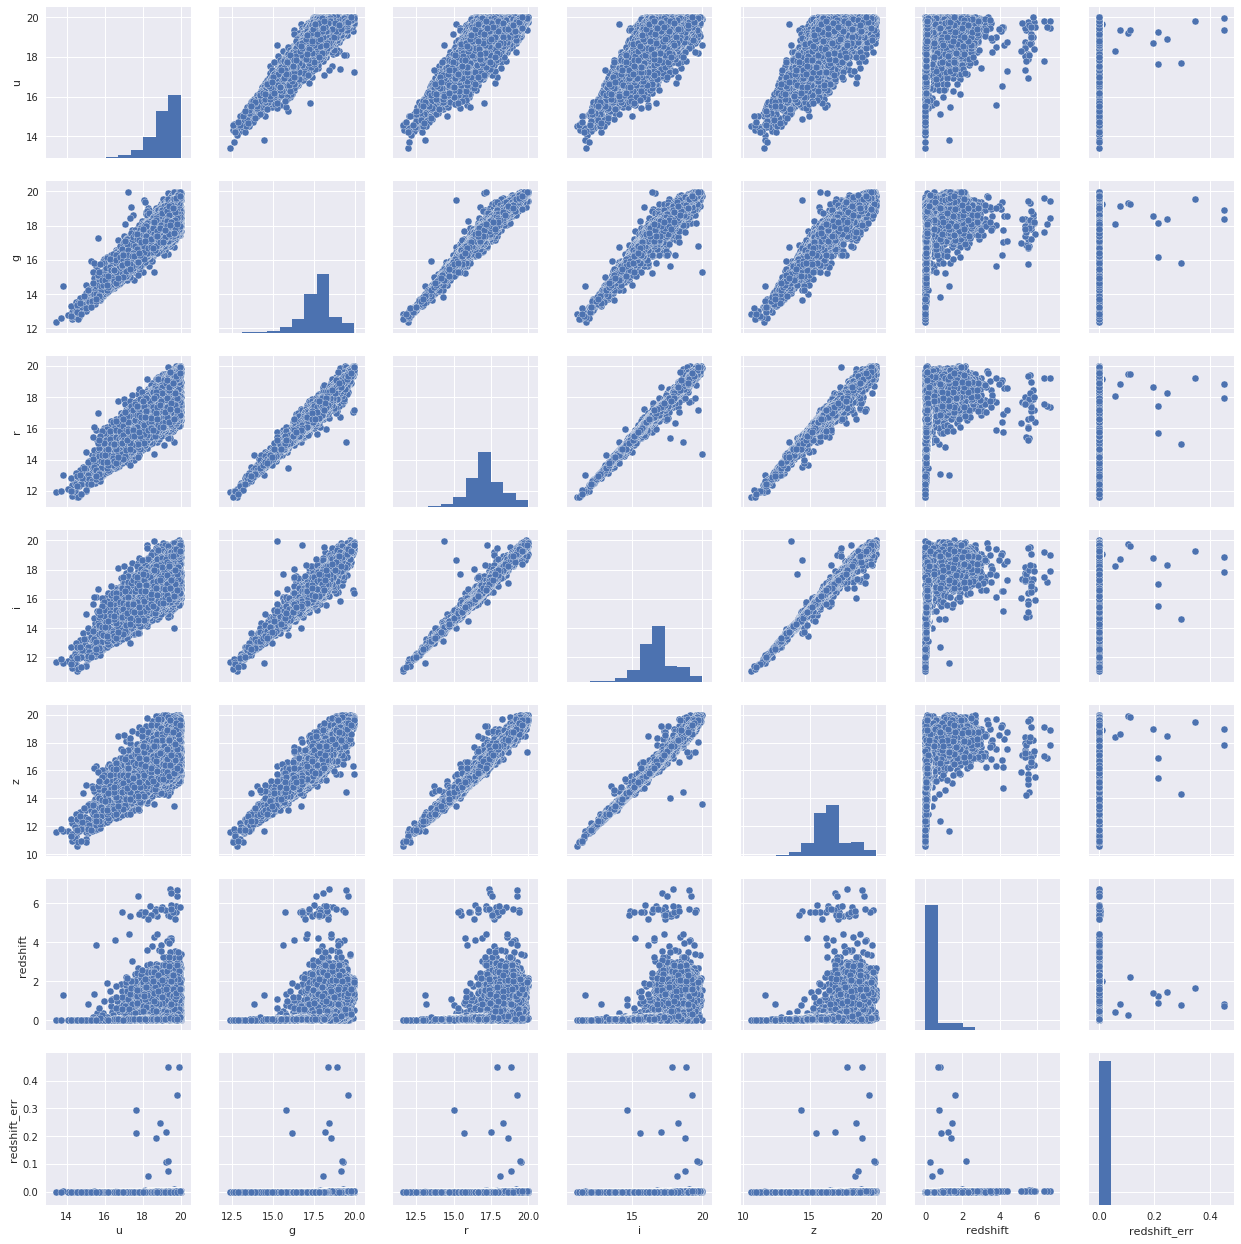

In [46]:
#scatterplot
sns.set()
cols = ['u', 'g', 'r', 'i', 'z', 'redshift', 'redshift_err']
sns.pairplot(df[cols], size = 2.5)
plt.show();


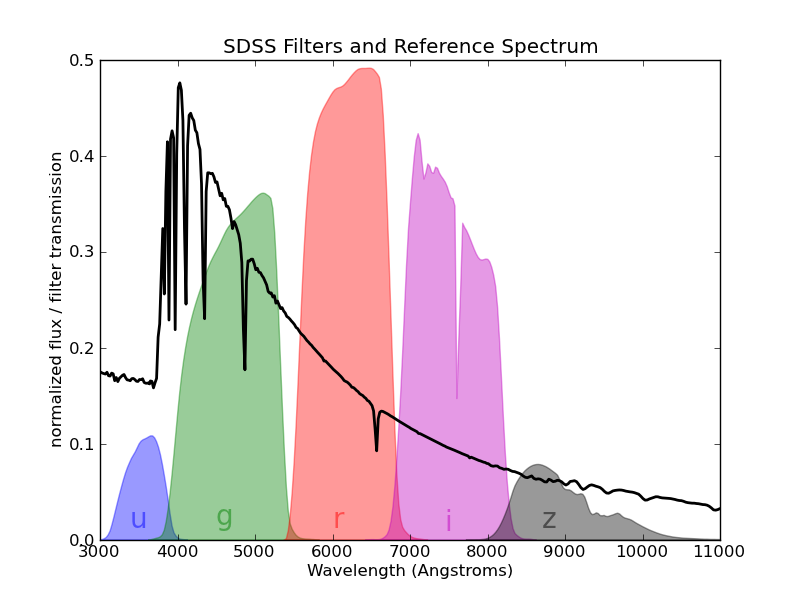

In [30]:
from IPython.display import Image
Image(filename='plot_sdss_filters_1.png',width=800, height=400)

In [31]:
# Creating features and targets
features = np.zeros((data.shape[0], 4))
features[:,0] = data['u'] - data['g']
features[:,1] = data['g'] - data['r']
features[:,2] = data['r'] - data['i']
features[:,3] = data['i'] - data['z']
  
targets = np.zeros(data.shape[0])
targets = data['redshift']

In [32]:
from sklearn.tree import DecisionTreeRegressor,export_graphviz
dtr = DecisionTreeRegressor(max_depth=3)
#dtr.fit(features, targets)
#predictions = dtr.predict(features)
#print(predictions[:4])
model = dtr

In [33]:
# split the data into training and testing features and predictions
split = 45000
train_features = features[:split]
test_features = features[split:]
  
train_targets = targets[:split]
test_targets = targets[split:]
model.fit(train_features, train_targets)
# get the predicted_redshifts
predictions = model.predict(test_features)
print('Median difference: {:f}'.format(np.median(np.abs(test_targets - predictions))))

Median difference: 0.038271


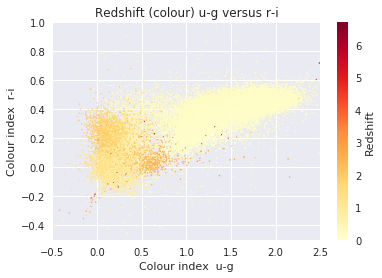

In [34]:
cmap = plt.get_cmap('YlOrRd')
redshift = data['redshift']
# Create the plot with plt.scatter and plt.colorbar
plot = plt.scatter(u_g, r_i, s=2, lw=0, c=redshift, cmap=cmap)
cb = plt.colorbar(plot)
cb.set_label('Redshift')
plt.xlabel('Colour index  u-g')
plt.ylabel('Colour index  r-i')
plt.title('Redshift (colour) u-g versus r-i')
# Set any axis limits
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 1)
    
plt.show()

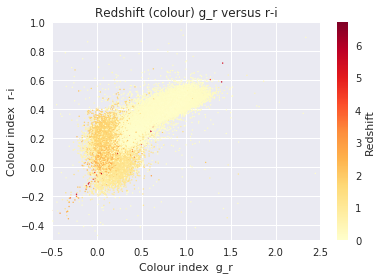

In [74]:
cmap = plt.get_cmap('YlOrRd')
redshift = data['redshift']
# Create the plot with plt.scatter and plt.colorbar
plot = plt.scatter(g_r, r_i, s=2, lw=0, c=redshift, cmap=cmap)
cb = plt.colorbar(plot)
cb.set_label('Redshift')
plt.xlabel('Colour index  g_r')
plt.ylabel('Colour index  r-i')
plt.title('Redshift (colour) g_r versus r-i')
# Set any axis limits
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 1)
    
plt.show()

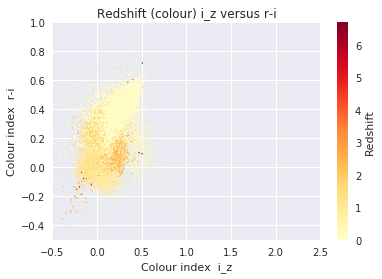

In [35]:
cmap = plt.get_cmap('YlOrRd')
redshift = data['redshift']
# Create the plot with plt.scatter and plt.colorbar
plot = plt.scatter(i_z, r_i, s=2, lw=0, c=redshift, cmap=cmap)
cb = plt.colorbar(plot)
cb.set_label('Redshift')
plt.xlabel('Colour index  i_z')
plt.ylabel('Colour index  r-i')
plt.title('Redshift (colour) i_z versus r-i')
# Set any axis limits
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 1)
    
plt.show()

In [36]:
import pydotplus as pydotplus
dot_data = export_graphviz(dtr, out_file=None,feature_names=['u - g', 'g - r', 'r - i', 'i - z'])
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_jpg("decision_tree.jpg")


True